# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [105]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [106]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
# Display number of data points and attributes
print('Number of data points: {0}, number of attributes: {1}'.format(auto_numeric.shape[0], auto_numeric.shape[1]))

Number of data points: 159, number of attributes: 16


### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [107]:
# Show 8 first data points
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [108]:
# Describe dataset
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

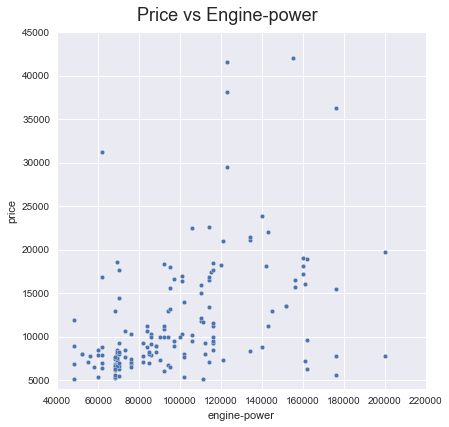

In [109]:
# Plot scatter of Price vs Engine-power
g = sns.pairplot(data=auto_numeric, x_vars=['engine-power'], y_vars=['price'], size=6)
g.axes[0,0].set_xlim(40000,)
g.axes[0,0].set_ylim(4000,)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Price vs Engine-power', fontsize=18)

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*My answer:*

There appears to be somewhat of a linear relationship between engine-power and price, but it is not very strong. Therefore, engine-power alone is sufficient to get a **rough estimate** on the price of the vehicle. Clearly, there are other factors that influence the price as well, as is obvious when looking in the price range [5000,10000], in which there are points with low, medium, and high engine-power values. It is important to note, however, that there is an uneven distribution in the data points: the vast majority of data points have a low price, and most points have a low to medium value for engine-power. This makes it harder to accurately estimate certain values (especially those in the high price range).

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

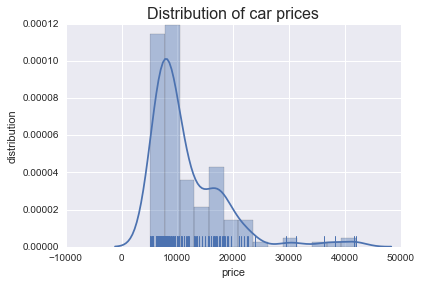

In [110]:
# Visualise distribution of car prices
car_prices = auto_numeric['price']
g = sns.distplot(car_prices, rug=True, bins=14) 
g.set_title('Distribution of car prices', fontsize=16)
_= g.set_ylabel('distribution')

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*My answer:*

I would apply a transformation to the data, such as log(x), in order to somewhat normalise the values and to reduce the extreme differences in distribution (e.g. the very high values in the 0-10000 range compared to those those that follow it).

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [111]:
# Retrieve input and target variables
X = auto_numeric['engine-power']
y = auto_numeric['price']

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [112]:
# Convert X to 2D array
X = X.reshape(len(X),1)
print(X.shape)

(159L, 1L)


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [113]:
# Use Hold-out validation to split data into 80:20 training:testing ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [114]:
# Fit training data to Linear Regression model
lr_classifier = LinearRegression(normalize=True)
lr_classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [115]:
# Derive prediction function based on general linear equation: y = mx + c
m = lr_classifier.coef_[0]
c = lr_classifier.intercept_
print("Equation: y= {0} * x + {1}".format(m, c))

Equation: y= 0.0898838874387 * x + 2823.1218911


### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*

When engine-power x increases by one unit, price y is estimated to increase by m\*x, i.e. 0.0899\*1 = 0.0899. The magnitude of the regression coefficient in this case tells us that an increase in engine-power by one unit results in an increase in the price by less than 9% of a unit. In other words, engine-power is not a very influential variable on price.

### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

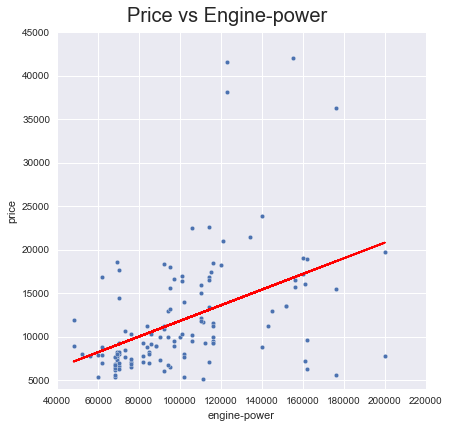

In [116]:
# Prepare training data
Xy_train = pd.DataFrame(columns=['engine-power', 'price'])
Xy_train['engine-power'] = X_train.reshape(len(X_train))
Xy_train['price'] = y_train.tolist()

# Show scatter plot
g = sns.pairplot(data=Xy_train, x_vars=['engine-power'], y_vars=['price'], size=6)
g.axes[0,0].set_xlim(40000,)
g.axes[0,0].set_ylim(4000,)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Price vs Engine-power', fontsize=20)

# Add regression line to plot
y_train_pred = lr_classifier.predict(X_train)
plt.plot(X_train, y_train_pred, "r")
plt.show()

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*My answer:*

The problem with hold-out validation is that not all data is used for training the classifier. The more data you train your classifier with, the better your classifier becomes. This is especially important with small datasets, where every extra sample is useful. In our case, the classifier missed out on 10% of the data (it was trained on 90%), which will result in a (perhaps significantly) lower accuracy.

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [117]:
# Construct 5-fold cross-validation iterator
kf_5 = KFold(len(auto_numeric), n_folds=5, shuffle=True, random_state=0)

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [118]:
# Display mean value of price variable in each fold
f = 0
for train_indeces, test_indeces in kf_5:
    train_f_price = auto_numeric["price"][train_indeces]
    f+= 1
    print("Mean of price in training fold {0}: {1}".format(f, train_f_price.mean()))

Mean of price in training fold 1: 11853.2677165
Mean of price in training fold 2: 11635.976378
Mean of price in training fold 3: 11689.8740157
Mean of price in training fold 4: 11709.8267717
Mean of price in training fold 5: 11535.84375


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [119]:
# Fit new Linear Regression model using the cross-validation iterator
lr_f5_classifier = LinearRegression(normalize=True)
lr_f5_pred = cross_val_predict(estimator=lr_f5_classifier, X=X, y=y, cv=kf_5)
print("Prediction has a shape of {0}, which is the same as that of the y vector: {1}.".format(lr_f5_pred.shape, y.shape))

Prediction has a shape of (159L,), which is the same as that of the y vector: (159L,).


### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [120]:
# Function for this and future questions in this assignment
def evaluate_model(y_true, y_pred):
    """ Returns Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute
    Error (MAE) and Correlation Coefficient (CC) for the given true and predicted y values"""
    # Calculate error metrics
    coeff_det = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    cc = np.corrcoef(y_true, y_pred)[0][1]
    # Return results
    return [coeff_det, rmse, mae, cc]

In [121]:
# Calculate and display error metrics
em_1 = evaluate_model(y, lr_f5_pred)
print("R^2: {0}, RMSE: {1}, MAE: {2}, CC: {3}".format(em_1[0], em_1[1], em_1[2], em_1[3]))

R^2: 0.173005270976, RMSE: 6114.45211862, MAE: 3987.95779619, CC: 0.417122199043


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*My answer:*

I noted in Q1.5 that while there appears to be a correlation between engine-power and price, the linear relationship is rather weak. These error metrics confirm that the regression line trained by our model doesn't represent our data very well (very low R^2), that there are often large differences between our predictions and the true outcomes (high RMSE and MAE), and that while there is a positive correlation between engine-power and price, the relationship is rather weak (low, positive CC).

In other words, because of a weak linear relationship and therefore a weakly trained classifier, we cannot be very certain that our model will predict an accurate price for a given engine-power.

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

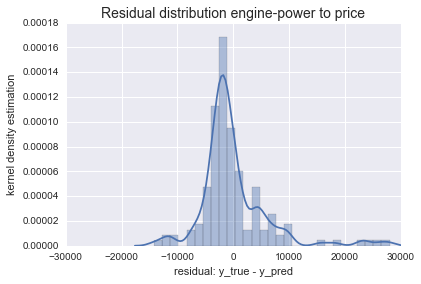

In [122]:
# Get residuals
res = y - lr_f5_pred
# Plot distribution of residuals
g = sns.distplot(res)
g.set_xlim(-30000, 30000)
g.set_xlabel('residual: y_true - y_pred')
g.set_title('Residual distribution engine-power to price', fontsize=14)
_= g.set_ylabel('kernel density estimation')

*My answer:*

Yes, this distribution looks like what I expected, i.e. a normal/gaussian distribution with a slight bias towards over-prediction due to some data points with extreme values (prices and engine-power).

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [123]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')
X_2 = auto_base['engine-power']
X_2 = X_2.reshape(len(X_2), 1) # convert X_2 to 2D array
y_2 = auto_base['price']

# Build LinearRegression model and get cross val. prediction
lr_f5_classifier_2 = LinearRegression(normalize=True)
lr_f5_pred_2 = cross_val_predict(estimator=lr_f5_classifier_2, X=X_2, y=y_2, cv=kf_5)

# Calculate and display error metrics
em_2 = evaluate_model(y_2, lr_f5_pred_2)
print("R^2: {0}, RMSE: {1}, MAE: {2}, CC: {3}".format(em_2[0], em_2[1], em_2[2], em_2[3]))

R^2: -0.00213595381121, RMSE: 6730.84360395, MAE: 4901.86096203, CC: -0.0619144160589


### ========== Question 1.23 ==========
Show a scatter plot of predicted vs. true price and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

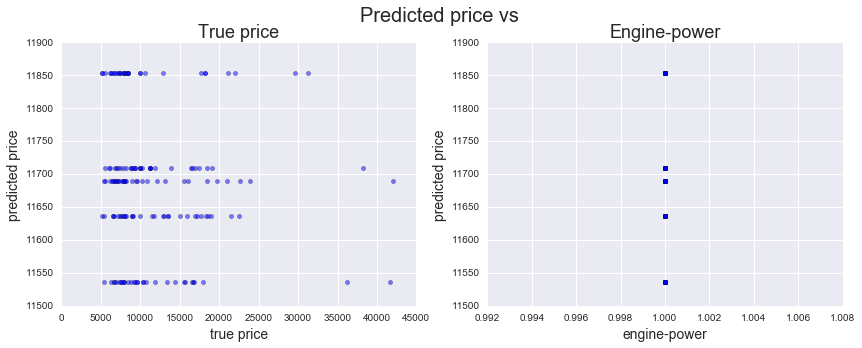

In [124]:
# Prepare subplots
f, ax = plt.subplots(figsize=(14, 10))

# Plot scatter of true vs predicted price
plt.subplot(2, 2, 1)
plt.title('True price', fontsize=18)
plt.scatter(x=y, y=lr_f5_pred_2, alpha=0.5)
plt.xlabel('true price', fontsize=14)
plt.ylabel('predicted price', fontsize=14)

# Plot scatter of engine-power vs predicted price
plt.subplot(2, 2, 2)
plt.title('Engine-power', fontsize=18)
plt.scatter(x=X_2, y=lr_f5_pred_2, alpha=0.5)
plt.xlabel('engine-power', fontsize=14)
plt.ylabel('predicted price', fontsize=14)

# Show plot
f.subplots_adjust(top=0.93)
f.suptitle('Predicted price vs', fontsize=20)
plt.show()

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*My answer:*

The simplest baseline model for the purposes of regression is one that takes the average of the dependant variables, i.e.: (sum of y for all x) / (amount of data points).
As can be seen in the above scatter plots, each predicted price takes a value roughly the same as the average of the true prices (between 11,500 and 11,900). This is a range and not a single value because we used a 5-fold cross validator, resulting in 5 averages/predictions: +-11540, +-11640, +-11690, +-11710, and +-11850.

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [125]:
# Your code goes here
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


*My answer:*

In the given dataset, the engine-power values have a standard deviation of 0 while the prices have a deviation of +-6744, i.e. the engine-power is the same for each data point while the price varies. In other words, there is no linear relationship between engine-power and price in the set. Clearly, a **linear regression** model cannot properly model a **non-linear relationship**, which is why our model performed so poorly. (In fact, there doesn't seem to be any particular relationship here, meaning that no classifier would accurately be able to predict the price for each engine-power input.)

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

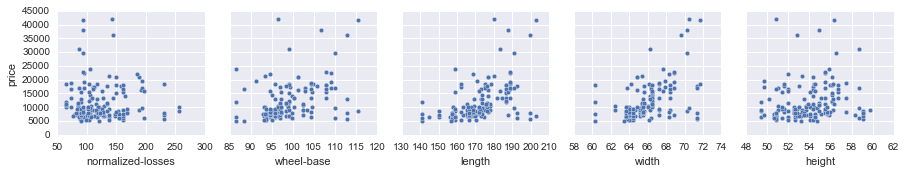

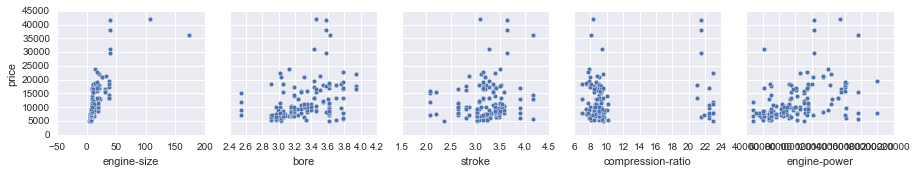

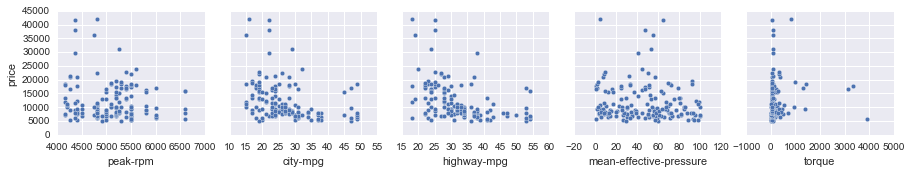

In [126]:
# Make scatter plot to visualise possible correlations between price and other variables
poss_corr_attr = auto_numeric.columns[0:len(auto_numeric.columns)-1] # all columns apart from price
g1 = sns.pairplot(data=auto_numeric, x_vars=poss_corr_attr[0:5], y_vars=['price'])
g2 = sns.pairplot(data=auto_numeric, x_vars=poss_corr_attr[5:10], y_vars=['price'])
g3 = sns.pairplot(data=auto_numeric, x_vars=poss_corr_attr[10:], y_vars=['price'])

*My answer:*

- Certain attributes seem to be at least somewhat correlated to the price. Notable examples include length and engine-power.
- Mean-effective-pressure and torque appear rather useless at predicting the price.
- Strongly related categories tend to exhibit correlations. Examples include (length, width, height) and (peak-rpm, city-mpg, highway-mpg).
- Mean-effective-pressure (MEP) and torque could be safely removed. There is a wide range of price values accross a wide range of MEP values. Knowing the MEP value doesn't help determine the price. The same can be said for torque, which has most values concentrated in a small range, with a high variation in price, i.e. the price can be very high or very low (or anything in-between) for the same torque value. There is a very weak or non-existent correlation between these 2 attributes and price, which is why they can be safely removed.

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [127]:
# Retrieve input and target data
X_3 = auto_numeric.drop(['price'], axis=1)
y_3 = auto_numeric['price']
# Use 5-fold cross validation to predict the output using a linear regression model
lr_f5_classifier_3 = LinearRegression(normalize=True)
lr_f5_pred_3 = cross_val_predict(estimator=lr_f5_classifier_3, X=X_3, y=y_3, cv=kf_5)

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [128]:
# Calculate and display error metrics
em_3 = evaluate_model(y_3, lr_f5_pred_3)
print("RMSE: {0}, MAE: {1}, CC: {2}".format(em_3[1], em_3[2], em_3[3]))

RMSE: 4819.80464283, MAE: 3050.34459963, CC: 0.742560270537


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*My answer:*

The Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) of our new model are lower than those of our Simple Linear Regression model. This means that the magnitude of errors is less, i.e. the predictions made are closer to the actual outcome. The correlation coefficient is also significantly higher, showing a rather strong positive linear relationship. Using multiple variables to train our classifier has resulted in a significantly better model (much better fit).

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

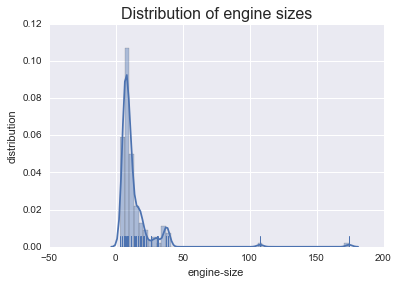

In [129]:
# Your code goes here
engine_sizes = auto_numeric['engine-size']
g = sns.distplot(engine_sizes, rug=True, bins=None) # Let distplot use Freedman-Diaconis rule for "sensible" bin size 
g.set_title('Distribution of engine sizes', fontsize=16)
_= g.set_ylabel('distribution')

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*My answer:*

There is a very large proportion of data that lies in the same engine-size range. In a linear regression model, this will cause the model to be fitted/weighted heavily towards the "trends" in that range. We are not only interested in the small engine-size range (where most data points are distributed in our data, according to the above plot), but rather in the general trends, accross all ranges (small, medium, and high engine-size values),

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

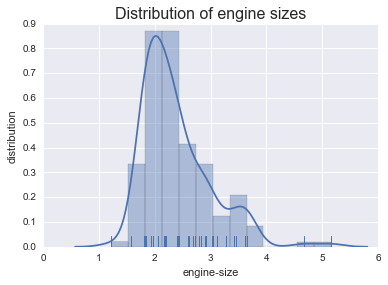

In [130]:
# Transform data
engine_sizes_transf = np.log(engine_sizes)
# Plot distribution
g = sns.distplot(engine_sizes_transf, rug=True, bins=13) 
g.set_title('Distribution of engine sizes', fontsize=16)
_= g.set_ylabel('distribution')

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [131]:
# Retrieve input and target data
auto_numeric_transf = auto_numeric.copy()
auto_numeric_transf["engine-size"] = engine_sizes_transf
X_4 = auto_numeric_transf.drop(['price'], axis=1)
y_4 = auto_numeric_transf['price']

# Use 5-fold cross validation to predict the output using a linear regression model
lr_f5_classifier_4 = LinearRegression(normalize=True)
lr_f5_pred_4 = cross_val_predict(estimator=lr_f5_classifier_4, X=X_4, y=y_4, cv=kf_5)

# Calculate and display error metrics
em_4 = evaluate_model(y_4, lr_f5_pred_4)
print("R^2: {0}, RMSE: {1}, MAE: {2}, CC: {3}".format(em_4[0], em_4[1], em_4[2], em_4[3]))

R^2: 0.689612268029, RMSE: 3745.91959756, MAE: 2668.36429567, CC: 0.831675321658


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*My answer:*

The performance has improved over the previous model. There are fewer errors and the correlation coefficient is noticeable higher. This is because our transformed data has allowed for our model to pick up on more general trends with regards to engine-power, thanks to a more balanced distribution of values. 

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [132]:
pd.set_option('max_columns', 30)

In [133]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')
# Display number of data points and attributes
print('Number of data points: {0}, number of attributes: {1}'.format(auto_full.shape[0], auto_full.shape[1]))
auto_full.head(20)

Number of data points: 159, number of attributes: 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*My answer:*

Categorical variables: make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, fuel-system.

Discrete quantitative variables that, for regression purposes, should be considered categorical: num-of-doors, num-of-cylinders, symboling.

Nominal attributes cannot be used in their current form because a regression classifier can't use them in any meaningful way. If the attribute is a pure category (make, fuel-type), the classifier cannot intrepret/use it at all, because it can only build a probabilistic model using numbers, not "abstract strings". If the attribute is a discrete quantitative variable (num-of-doors, num-of-cylinders), the classifier might be able to use it, but often not in any meaningful way, because it may not understand the meaning of the values.

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiarise yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [134]:
# Separate and label-encode categorical values
categorical_attributes = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'num-of-doors', 'num-of-cylinders', 'symboling']
auto_full_categorical = auto_full[categorical_attributes]
auto_full_categorical = auto_full_categorical.apply(LabelEncoder().fit_transform)

# Replace categorical values with encoded values in copy of auto_full
auto_full_edit = auto_full.copy()
auto_full_edit[auto_full_categorical.columns] = auto_full_categorical

# Transform categorical variables with One-Hot-Encoding
auto_full_cols = auto_full_edit.columns.tolist()
categorical_attributes_indices = [auto_full_cols.index(c) for c in categorical_attributes]
oh_enc = OneHotEncoder(categorical_features=categorical_attributes_indices)
X_enc = oh_enc.fit_transform(auto_full_edit.drop(['price'], axis=1))
print(X_enc.shape)

(159, 70)


### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [135]:
# Get input and target attributes
X_5 = X_enc # for consistency
y_5 = auto_full_edit['price']

# Use 5-fold cross validation to predict the output using a linear regression model
lr_f5_classifier_5 = LinearRegression(normalize=True)
lr_f5_pred_5 = cross_val_predict(estimator=lr_f5_classifier_5, X=X_5, y=y_5, cv=kf_5)

# Calculate and display error metrics
em_5 = evaluate_model(y_5, lr_f5_pred_5)
print("R^2: {0}, RMSE: {1}, MAE: {2}, CC: {3}".format(em_5[0], em_5[1], em_5[2], em_5[3]))

R^2: 0.867496224832, RMSE: 2447.4864926, MAE: 1675.72949793, CC: 0.936024475874


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

This model performs better than the one in 2.8 (and, thereby, better than that of 2.3). The model fits the data better, as evidenced by the higher coefficient of determination (R^2), the lower prediction error rate (RMSE and MAE), and the higher correlation between the predicted and true values (CC).

The advantage is that the descriptiveness of the available data is enhanced, because there are more attributes that contribute to our model (# car doors, # cylinders, etc.). The disadvantage is that encoding the data takes up more memory and time, which makes this complex model computationally more expensive.

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [136]:
# Decision Tree Regressor
dt_f5_classifier = DecisionTreeRegressor()
dt_f5_pred = cross_val_predict(estimator=dt_f5_classifier, X=X_5, y=y_5, cv=kf_5)
em_6 = evaluate_model(y_5, dt_f5_pred)
print("Decision tree regressor: R^2: {0}, RMSE: {1}, MAE: {2}, CC: {3}".format(em_6[0], em_6[1], em_6[2], em_6[3]))

# Random Forest Regressor
rf_f5_classifier = RandomForestRegressor(n_estimators=20, max_depth=20,max_features=60)
rf_f5_pred = cross_val_predict(estimator=rf_f5_classifier, X=X_5, y=y_5, cv=kf_5)
em_7 = evaluate_model(y_5, rf_f5_pred)
print("Random forest regressor: R^2: {0}, RMSE: {1}, MAE: {2}, CC: {3}".format(em_7[0], em_7[1], em_7[2], em_7[3]))

Decision tree regressor: R^2: 0.71335373587, RMSE: 3599.80785825, MAE: 2383.44654088, CC: 0.858082633131
Random forest regressor: R^2: 0.831041380476, RMSE: 2763.73471641, MAE: 1772.92106918, CC: 0.913746844402


*Your answer goes here:*